In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi']=100

In [3]:
df = pd.read_csv('../Data/HR_comma_sep.csv')
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2             

In [4]:
df['salary']=df['salary'].map({'low':1,'medium':2,'high':3})
print(df['salary'])

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int64


In [5]:
df[['salary']]= MinMaxScaler().fit_transform(df[['salary']])
print(df['salary'])

0        0.0
1        0.5
2        0.5
3        0.0
4        0.0
        ... 
14994    0.0
14995    0.0
14996    0.0
14997    0.0
14998    0.0
Name: salary, Length: 14999, dtype: float64


<AxesSubplot:xlabel='left', ylabel='count'>

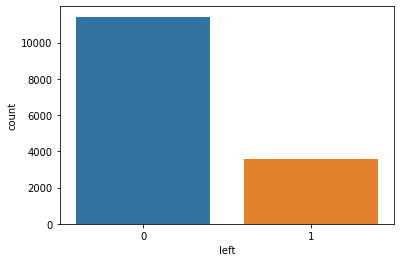

In [6]:
sns.countplot('left', data=df)

<AxesSubplot:>

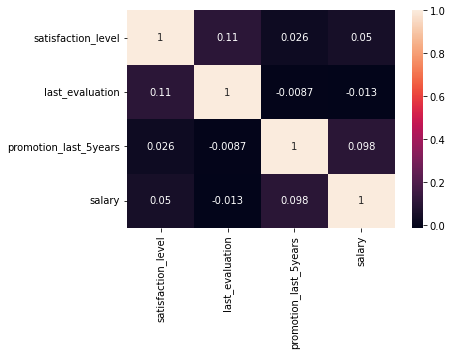

In [7]:
sns.heatmap(df[['satisfaction_level','last_evaluation','promotion_last_5years','salary']].corr(),annot=True)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df[['satisfaction_level','last_evaluation','promotion_last_5years','salary']],df.left, test_size=0.1)

In [9]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train,y_train)

In [10]:
intercept = model.intercept_
coefs = model.coef_
score = model.score(x_train,y_train)
print(score)
print(coefs)
prob_matrix = model.predict_proba(x_train)

0.7807244981109712
[[-3.81181261  0.51940885 -1.34592916 -1.24756656]]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = model.predict(x_train)
m=classification_report(y_train,y_train_pred)
cm = confusion_matrix(y_train,y_train_pred)
print(m)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     10305
           1       0.58      0.26      0.36      3194

    accuracy                           0.78     13499
   macro avg       0.69      0.60      0.62     13499
weighted avg       0.75      0.78      0.75     13499



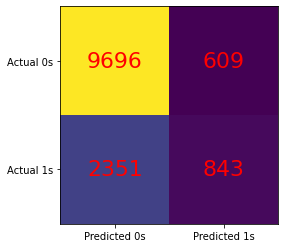

In [12]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='r', fontsize=22)
plt.show()

In [13]:
y_pred = model.predict(x_test) # Making prediction
pred_score = model.score(x_test,y_test)
pred_prod_matrix= model.predict_proba(x_test)
print(pred_prod_matrix)
print(x_test)

[[0.94231503 0.05768497]
 [0.88630104 0.11369896]
 [0.73206821 0.26793179]
 ...
 [0.85989516 0.14010484]
 [0.67776563 0.32223437]
 [0.87708733 0.12291267]]
       satisfaction_level  last_evaluation  promotion_last_5years  salary
9978                 0.92             0.78                      0     0.5
11397                0.55             0.69                      0     1.0
1433                 0.41             0.48                      0     0.5
2752                 0.82             0.55                      0     0.5
5807                 0.48             0.51                      0     0.0
...                   ...              ...                    ...     ...
9202                 0.63             0.51                      0     0.0
5074                 0.61             0.75                      0     0.0
9855                 0.67             0.83                      0     0.5
13240                0.52             0.59                      0     0.0
11060                0.70     

In [14]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function( inter, b1,satisfaction_level , b2,last_evaluation,b3,promotion_last_5years,b4,salary):
    z= inter + b1* satisfaction_level + b2*last_evaluation + b3*promotion_last_5years + b4*salary
    return sigmoid(z)

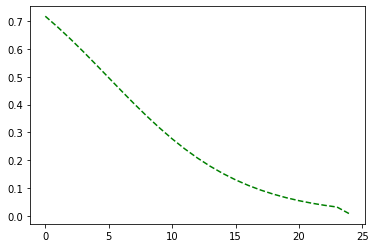

In [15]:
satis_level = np.linspace(0,1 , 25)
last_eval = np.linspace(0,1, 25)
promotion_5year = np.linspace(0,1, 25, dtype=int)
salaries = np.linspace(0,1 , 25)
sigs = []
i=0
while i < 25:
    sigs.append(prediction_function(intercept[0],coefs[0][0] ,satis_level[i],coefs[0][1],last_eval[i], coefs[0][2],promotion_5year[i], coefs[0][3],salaries[i]))
    i += 1
plt.plot( sigs, color='g', linestyle='--')

In [16]:
# save model
import pickle
with open('./models/model_Logistic_MultipleVariables_BinaryAndOrdinal', 'wb') as f:
    pickle.dump(model, f)